## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

### 2. Load the dataset and display a sample of five rows of the data frame.

In [ ]:
df = pd.read_csv('heart_data.csv')
df.head()

### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [7]:
## Check the shape 
df.shape

(319795, 18)

### 4. Check the statistical summary of the dataset and write your inferences.

In [8]:
## check the statistical summary of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [9]:
## checking missing values in each columns
df.isnull().sum()/len(df)*100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [10]:
##checking length of duplicate
len(df[df.duplicated()])

18078

In [12]:
##dropping duplicates
df.drop_duplicates(inplace=True)

In [13]:
##checking the shape after dropping the duplicates
df.shape

(301717, 18)

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

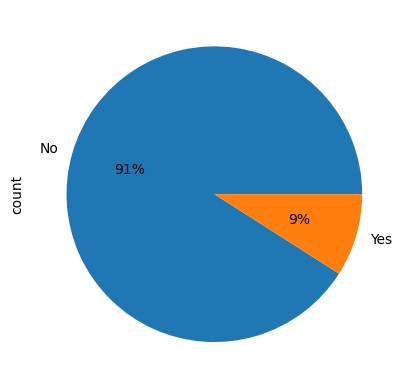

In [14]:
## let's check the count of the target variable
df['HeartDisease'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [26]:
##Categorical features in the dataset
categorical_features = df.select_dtypes(include=[object])
categorical_features.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

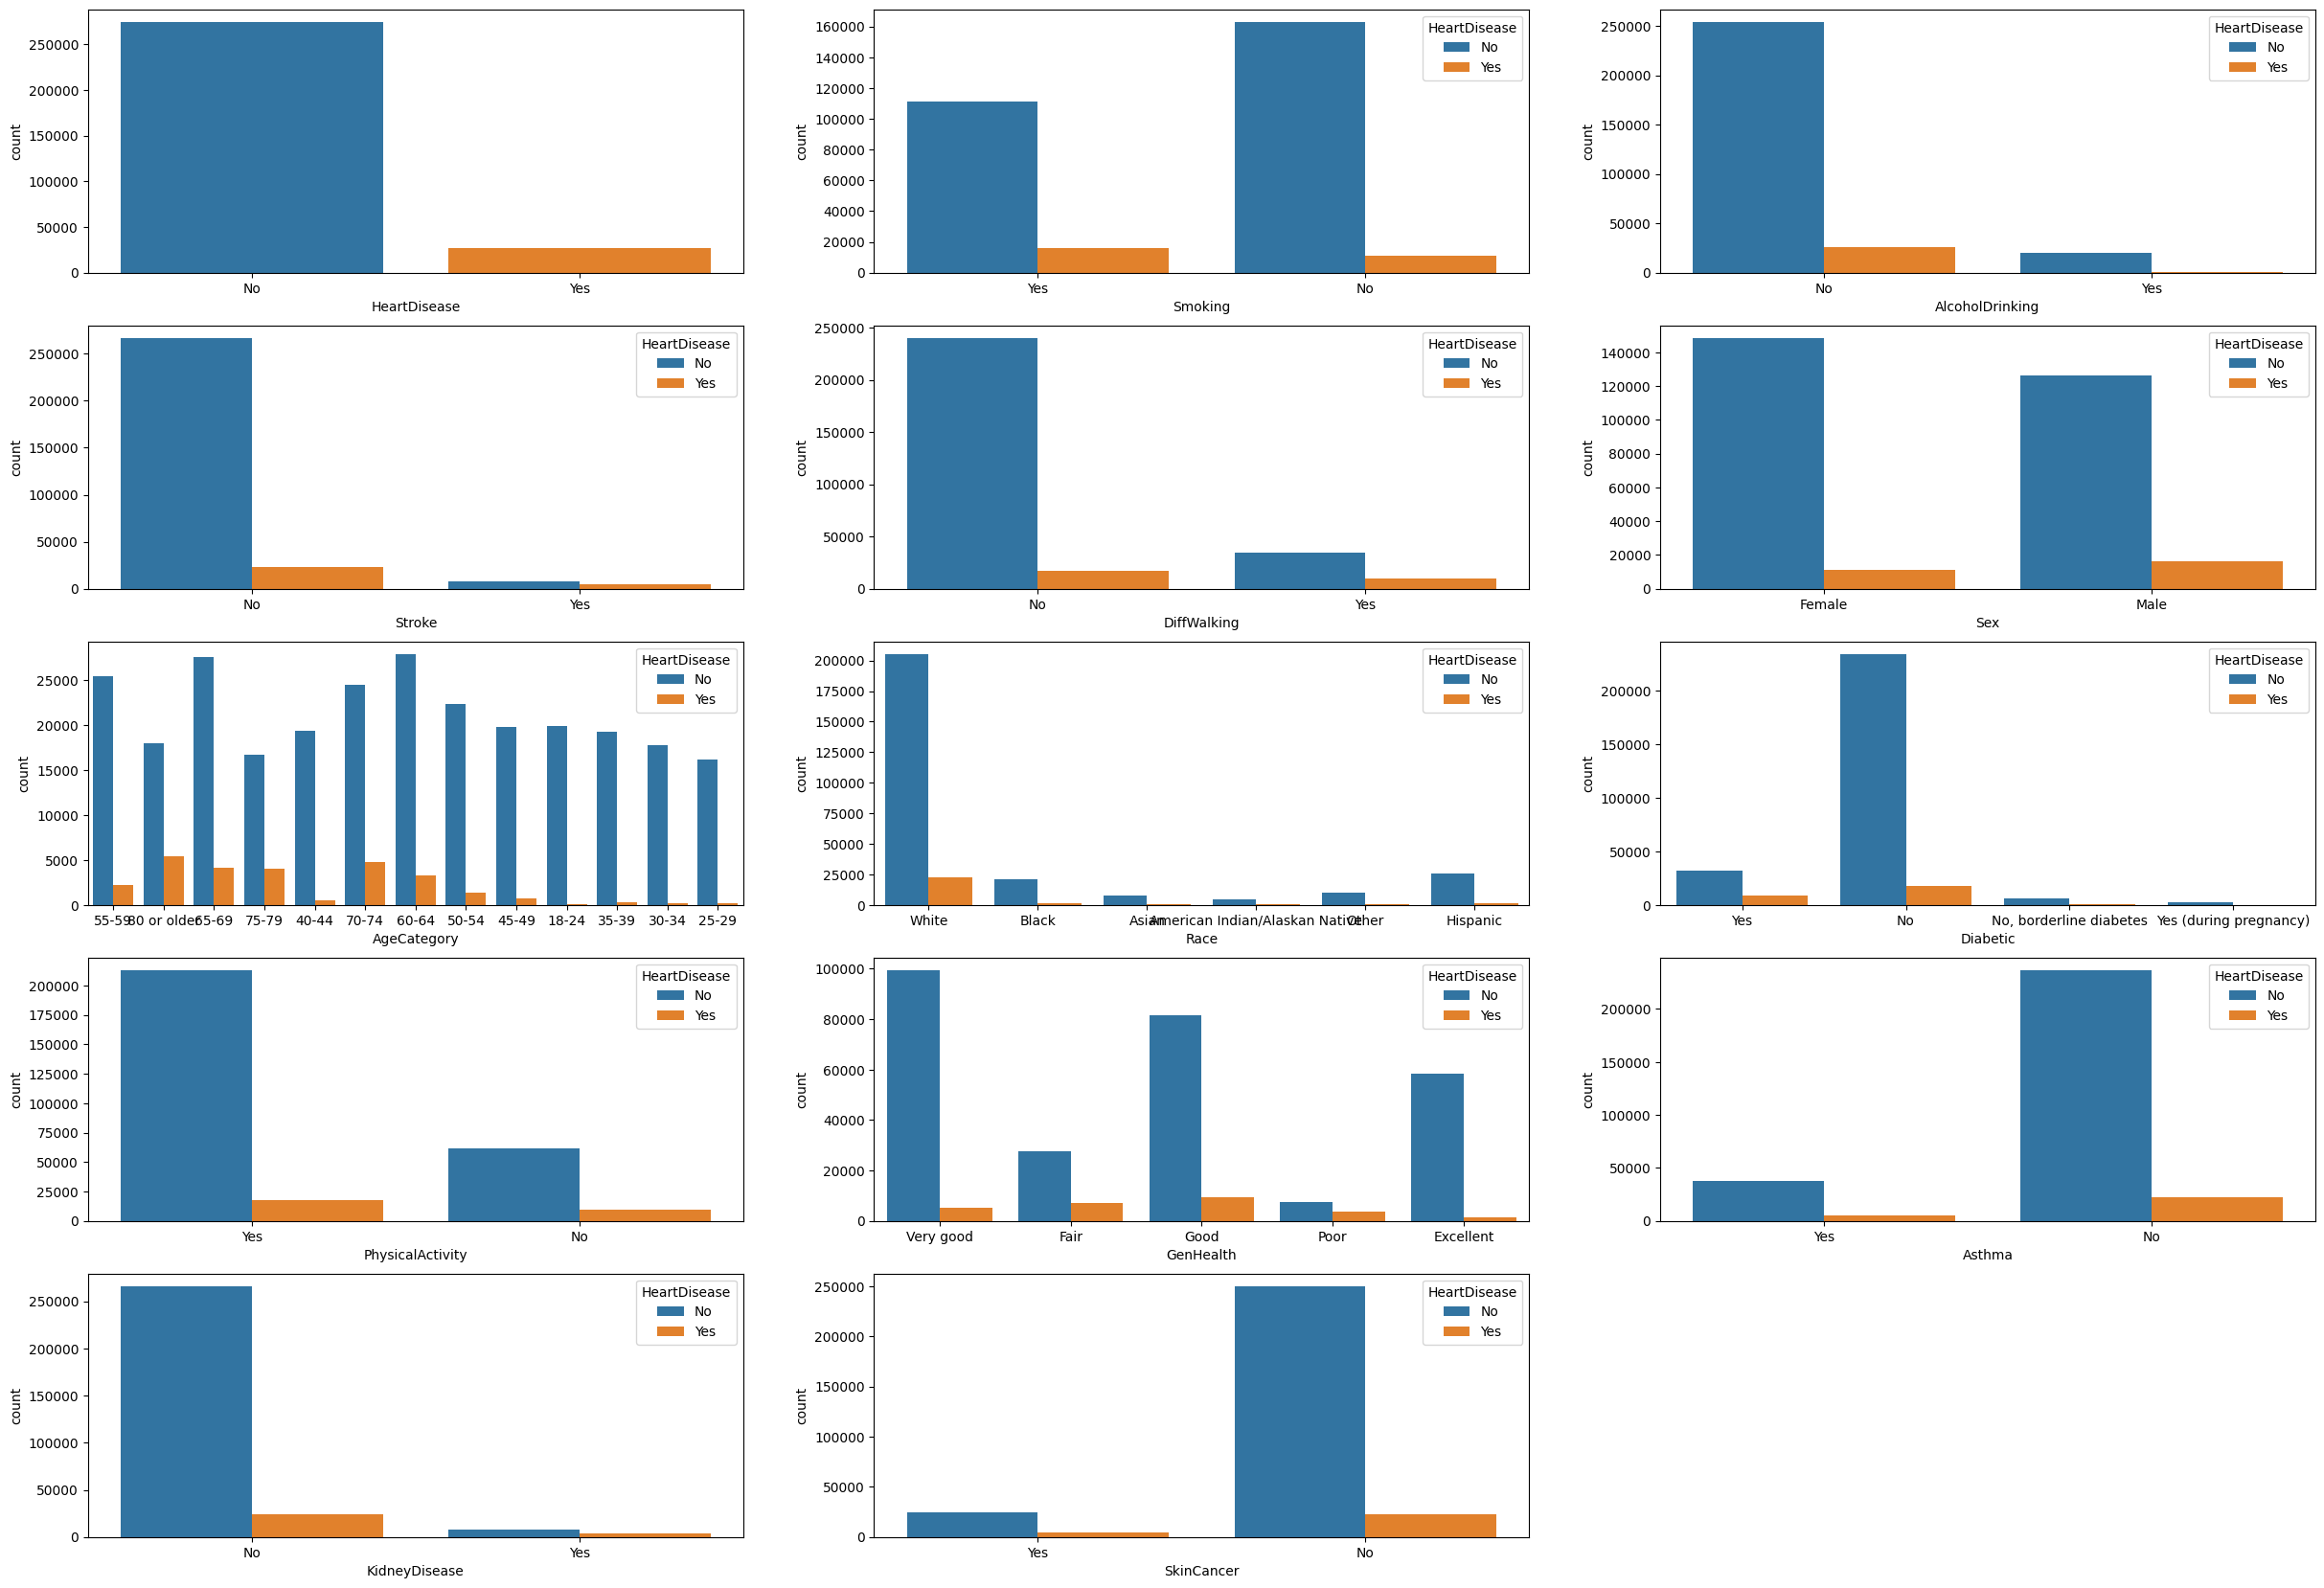

In [27]:
i = 1
plt.figure(figsize = (30,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature,hue = 'HeartDisease', data = df)
    i +=1

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [28]:
## Let check the unique categories in the column 'Diabetic'
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [29]:
df['Diabetic'] = df['Diabetic'].replace({'Yes (during pregnancy)':'Yes','No, borderline diabetes':'No'})

In [30]:
## recheck
df['Diabetic'].value_counts()

Diabetic
No     258572
Yes     43145
Name: count, dtype: int64

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [31]:
## Replacing "No" as 0 and "Yes" as 1
df['HeartDisease'] = df['HeartDisease'].replace({'Yes':1,'No':0})

In [32]:
## Check
df['HeartDisease'].value_counts()

HeartDisease
0    274456
1     27261
Name: count, dtype: int64

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [33]:
## Label Encoding categorical variables using "AgeCategory", "Race", and "GenHealth" label encoder

## Select object datatype variables
object_type_variables = [i for i in df[['AgeCategory', 'Race', 'GenHealth']] if df.dtypes[i] == object]
object_type_variables

le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))
        df[i] = q
        df[i] = df[i].astype(int)
encoder(df)

In [34]:
## Dummy encoding the rest of the columns, since they have binary entries. 'Yes' or 'No'
df = pd.get_dummies(df, drop_first=True)

In [35]:
## Let check few samples after encoding
df.head(2)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,5,4,5.0,True,False,False,False,False,True,True,True,False,True
1,0,20.34,0.0,0.0,12,5,4,7.0,False,False,True,False,False,False,True,False,False,False


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [37]:
## Lets store the target column in the Y variable and the rest of the columns in the x variable.
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [38]:
## train_test_split() is used to drive dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(241373, 17) (60344, 17)
(241373,) (60344,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [39]:
## Standardizing only numerical columns. (not standardizing the dummy encoded data)
ss = StandardScaler()
X_train.iloc[:,:7] = ss.fit_transform(X_train.iloc[:,:7])
X_test.iloc[:,:7] = ss.transform(X_test.iloc[:,:7])


In [41]:
## Lets check few scaled features
X_train.head(2)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
91490,-0.419798,-0.43877,-0.506836,1.534243,0.514505,-1.468086,0.623659,True,False,False,False,True,False,False,False,False,False
276836,-0.726675,-0.43877,1.956288,-1.815842,0.514505,-0.145249,3.348473,False,False,False,False,True,False,False,True,False,False


In [42]:
X_test.head(2)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
185145,1.596607,3.241731,-0.506836,0.696722,0.514505,-0.806667,1.304862,False,False,False,False,True,True,True,False,False,False
168905,4.102776,-0.316086,1.340507,-0.978321,0.514505,-0.145249,-0.738748,True,False,False,False,False,False,True,False,False,False


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [63]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as input
    model.fit(X_train, y_train)    # fits the model with the train data
    pred = model.predict(X_test)   # makes predictions on the test set
    accuracy = accuracy_score(y_test, pred)
    return accuracy       # return all the metrics

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [64]:
## Initializing the models
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf', rf),('knn', knn), ('gb', gb), ('adb', adb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

In [ ]:
result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr, nb, knn, dt, adb, gb, sc],
                             ['Logistic Regression', 'Naive Bayes', 'KNN', 'Decision Tree',
                              'Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']):
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)

In [ ]:
result

### Conclusion

----
## Happy Learning:)
----